# Visualize Conv Layers

In [1]:
# First, import TF and get its version.
import tensorflow as tf
from tensorflow.keras import models
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print('\033[91m' + 'WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print('\033[92m' + 'OK: TensorFlow >= 2.0.0' + '.\033[0m')

2022-04-10 17:15:10.579454: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-10 17:15:10.579496: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


OK: TensorFlow >= 2.0.0.


In [10]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import utils
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [17]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [18]:
n_classes = 10
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
Y_train = utils.to_categorical(y_train, n_classes)
Y_test = utils.to_categorical(y_test, n_classes)
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [19]:
D = X_train.shape[1:]
print(D)

cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=3, input_shape=D, padding='same'))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(Conv2D(32, kernel_size=3, input_shape=D, padding='same'))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(2))
cnn.add(Conv2D(32, kernel_size=3, input_shape=D, padding='same'))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(2))
cnn.add(Flatten())
cnn.add(Dense(n_classes, activation='softmax'))


cnn.summary()

(32, 32, 3)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_3 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 32, 32

In [20]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log = cnn.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10
391/391 [==============================] - 61s 155ms/step - loss: 1.4064 - accuracy: 0.5023 - val_loss: 1.8130 - val_accuracy: 0.3423
Epoch 2/10
391/391 [==============================] - 60s 153ms/step - loss: 1.0072 - accuracy: 0.6462 - val_loss: 1.1717 - val_accuracy: 0.6026
Epoch 3/10
391/391 [==============================] - 60s 152ms/step - loss: 0.8805 - accuracy: 0.6954 - val_loss: 0.9726 - val_accuracy: 0.6646
Epoch 4/10
391/391 [==============================] - 60s 153ms/step - loss: 0.8045 - accuracy: 0.7219 - val_loss: 0.9715 - val_accuracy: 0.6654
Epoch 5/10
391/391 [==============================] - 60s 152ms/step - loss: 0.7524 - accuracy: 0.7409 - val_loss: 0.9494 - val_accuracy: 0.6740
Epoch 6/10
391/391 [==============================] - 60s 153ms/step - loss: 0.7126 - accuracy: 0.7538 - val_loss: 0.8501 - val_accuracy: 0.7094
Epoch 7/10
391/391 [==============================] - 59s 151ms/step - loss: 0.6820 - accuracy: 0.7649 - val_loss: 1.2060 - val_ac

In [71]:
def show_filters(model, layer_nr, test_im):
    output =  model.layers[layer_nr].output
    activation_model = models.Model(inputs=model.input, outputs=output)
    test_im = test_im.reshape(1,32,32,-1)
    num_filters = output.shape[3]
    print(num_filters)
    plt.subplot(1,num_filters,1)

    print(test_im.shape)
    activation = activation_model.predict(test_im)
    print(activation.shape)
    print(activation[0, :, :, 0])
    
    for i in range(num_filters):
        print(f'input is {i}')
        print(activation.shape)
        data = activation[0, :, :, num_filters]
        print(data)
        # display 6 of the activations of the 1st conv layer
        plt.matshow(activation[0, :, :, num_filters], cmap='Greys')


32
(1, 32, 32, 3)
(1, 32, 32, 32)
[[-0.40483403 -0.17292431 -0.18686025 ... -0.1368731  -0.12811542
   0.00992521]
 [-0.35085368 -0.10453141 -0.11814193 ... -0.08667679 -0.08012021
   0.05890208]
 [-0.35392475 -0.11084239 -0.12277881 ... -0.09317951 -0.08663334
   0.0616753 ]
 ...
 [-0.3441543  -0.13502271 -0.15203837 ... -0.0894962  -0.14689691
  -0.08261077]
 [-0.33119065 -0.16603771 -0.15778154 ... -0.09939879 -0.1708319
  -0.06250197]
 [-0.14727066 -0.02206569 -0.02729648 ... -0.03900842 -0.04700314
   0.0098539 ]]
input is 0
(1, 32, 32, 32)


IndexError: index 32 is out of bounds for axis 3 with size 32

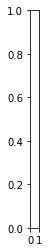

In [72]:
show_filters(cnn, 0, X_test[0])